In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
## Checking any null values
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
## checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
## dropping unnamed column as it has no use
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
### checking central tendancy of the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

<AxesSubplot:xlabel='TV', ylabel='Sales'>

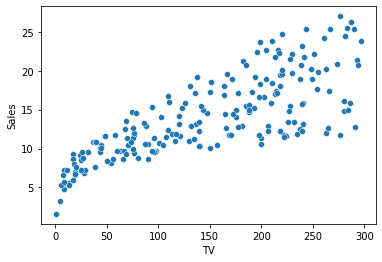

In [9]:
## since it is regression problem we can plot scatter plot first
sns.scatterplot(x='TV',y='Sales',data=df)



<AxesSubplot:xlabel='Radio', ylabel='Sales'>

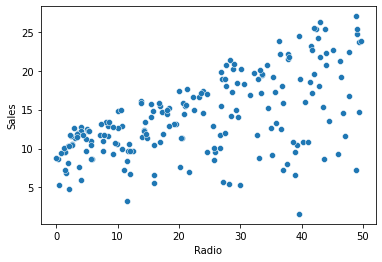

In [10]:
sns.scatterplot(x='Radio',y='Sales',data=df)


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

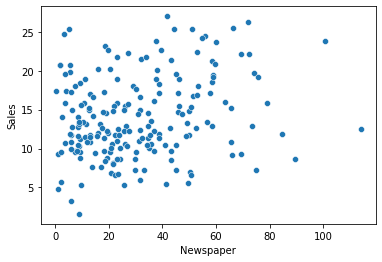

In [11]:
sns.scatterplot(x='Newspaper',y='Sales',data=df)


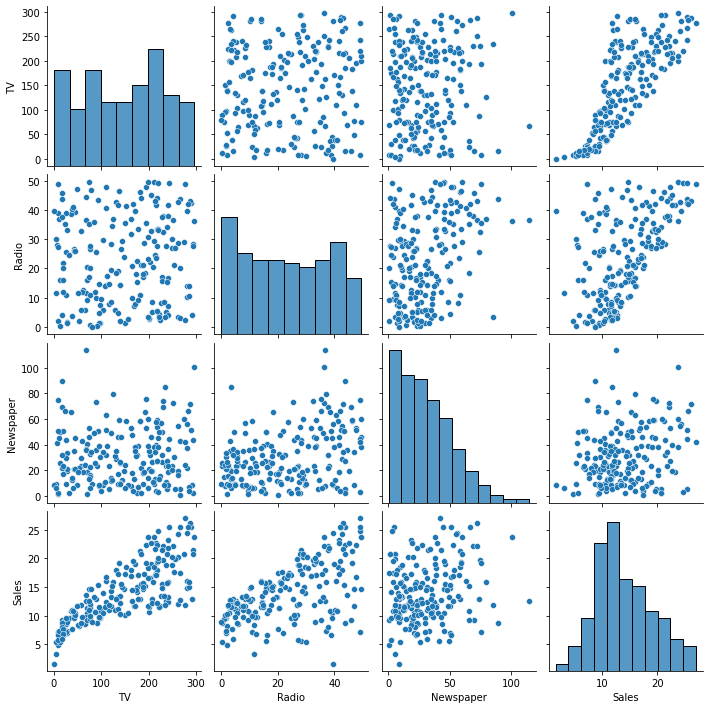

In [12]:
sns.pairplot(df)


## Observation:- Sales having more linear relationship with TV and Radio rather than newspaper

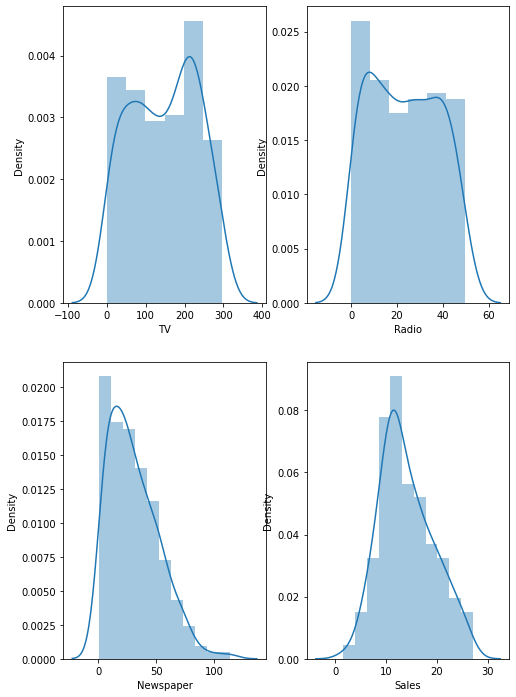

In [13]:
## checking distribution of features
plt.figure(figsize=(8,12))
plotnumber=1
for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
    plotnumber=plotnumber + 1
plt.show()

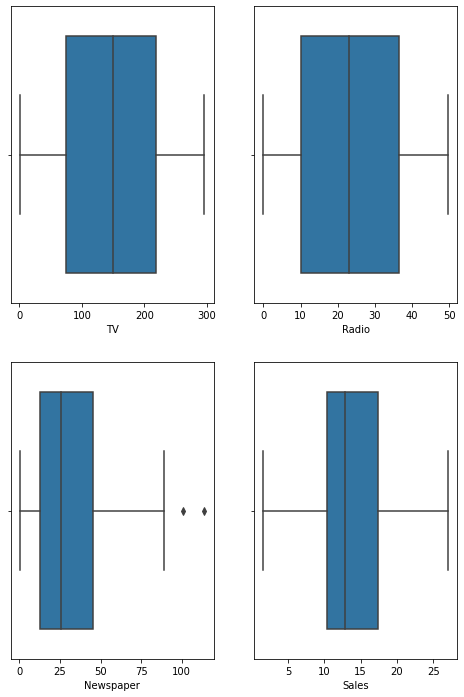

In [14]:
plt.figure(figsize=(8,12))
plotnumber=1
for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
    plotnumber=plotnumber + 1
plt.show()

In [15]:
## Lets remove the outliers
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [16]:
from scipy.stats import zscore

In [17]:
df=df[np.abs(zscore(df)<3).all(axis=1)]

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [19]:
df.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

In [20]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


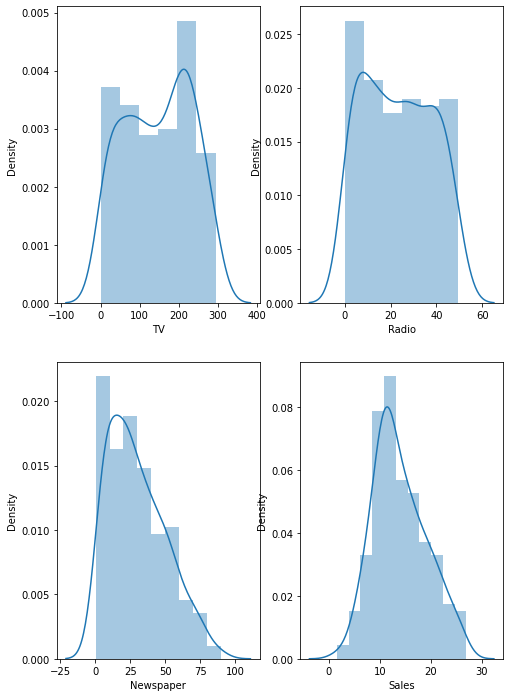

In [21]:
plt.figure(figsize=(8,12))
plotnumber=1
for column in df:
    if plotnumber <= 4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
    plotnumber=plotnumber + 1
plt.show()

In [22]:
## lets check multicolinearity
corr=df.corr()

<AxesSubplot:>

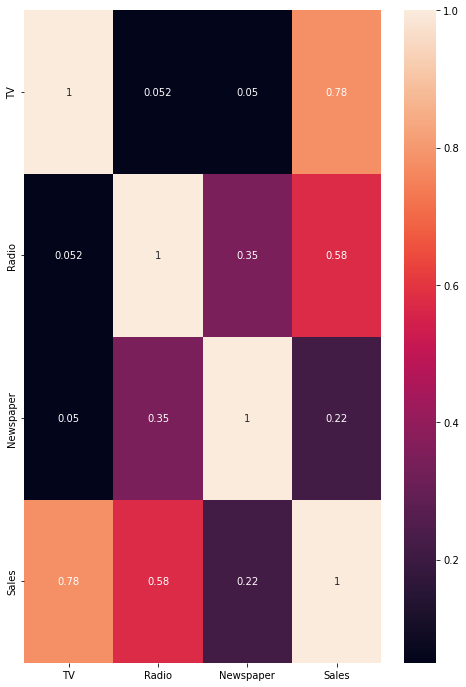

In [23]:
plt.figure(figsize=(8,12))
sns.heatmap(corr,annot=True,annot_kws={'size':10})

### Observation: From the heatmap we can conclude TV advetisment contribute more on sales

In [24]:
## Buiding a model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
X=df.drop('Sales',axis=1)
y=df.Sales

In [26]:
scaler=StandardScaler()

In [27]:
x_scaled=scaler.fit_transform(X)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.23,random_state=201)

In [29]:
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
ypred=lr.predict(x_train)
lr.score(x_train,y_train)

0.892322288555537

In [32]:
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

0.9003591121315521

In [33]:
##Regularization 
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [34]:
## Ridge Regression through cross-validation
ridgecv=RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [35]:
ridgecv.alpha_

0.1

In [36]:
## So the best alpha=0.1
ridge=Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [37]:
ypred=ridge.predict(x_train)
ridge.score(x_train,y_train)


0.8923218981110588

In [38]:
y_pred=ridge.predict(x_test)
ridge.score(x_test,y_test)


0.9003404956338241

In [39]:
lassocv=LassoCV(cv=5,max_iter=10000,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(cv=5, max_iter=10000, normalize=True)

In [40]:
lassocv.alpha_

0.00318095325422778

In [41]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.00318095325422778)

In [42]:
ypred=lasso.predict(x_train)
lasso.score(x_train,y_train)

0.8923213592781928

In [43]:
ypred=lasso.predict(x_test)
lasso.score(x_test,y_test)

0.9004295966679907

In [44]:
accuracy=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print('Accuracy - ',accuracy*100)
print("MSE  - ",mse)
print('MAE  - ',mae)

Accuracy -  90.03404956338241
MSE  -  2.959853369069022
MAE  -  1.3576116341243036


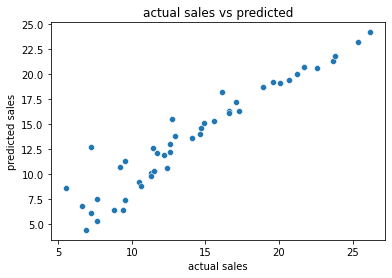

In [45]:
sns.scatterplot(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()


In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [48]:
ypred=clf.predict(x_train)
clf.score(x_train,y_train)

1.0

In [49]:
ypred=clf.predict(x_test)
clf.score(x_test,y_test)

0.9411426429178824

In [50]:
## since it is overfitting model
from sklearn.model_selection import GridSearchCV
param={'criterion':['mse','mae'],
        'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_leaf':range(2,10),
        'min_samples_split':range(3,10),
        'max_leaf_nodes':range(3,10)

}

In [51]:
gv=GridSearchCV(estimator=clf,param_grid=param,cv=5,n_jobs=1)

In [52]:
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': range(3, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [53]:
gv.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [54]:
gv.best_score_

0.8734446033335779

In [55]:
clf=DecisionTreeRegressor(criterion='mae',max_depth=4,max_leaf_nodes=9,min_samples_leaf=9,min_samples_split=3)

In [56]:
clf.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=4, max_leaf_nodes=9,
                      min_samples_leaf=9, min_samples_split=3)

In [57]:
ypred=clf.predict(x_train)
accuracy=r2_score(y_train,ypred)
print(accuracy)

0.9244397155034022


In [58]:
y_pred=clf.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.8424645251261528


In [59]:
print('MSE - ',mean_squared_error(y_test,y_pred))
print('MAE  - ',mean_absolute_error(y_test,y_pred))
print('RMSE  - ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE -  4.678749999999999
MAE  -  1.498913043478261
RMSE  -  2.1630418396323265


In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
ypred=rf.predict(x_train)
accuracy=r2_score(y_train,ypred)
print(accuracy)

0.9964788920078707


In [63]:
y_pred=rf.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9789666028265331


In [65]:
## we can tune to find best parameters
params={'n_estimators':[100],
       'max_depth':[1,2,3,4,5,6,7,8,9],
       'min_samples_split':[1,2,3,4,5,6,7,8,9,10,11,12],
        'min_samples_leaf':[2,3,4,5,6,7],
        'max_features':['auto','sqrt','log'],
        'bootstrap':[True]
       }

In [66]:
gv=GridSearchCV(estimator=rf,param_grid=params,cv=5,n_jobs=1)

In [67]:
gv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'bootstrap': [True],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12],
                         'n_estimators': [100]})

In [68]:
gv.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [69]:
rf=RandomForestRegressor(bootstrap=True,max_depth=9,max_features='auto',min_samples_split=3,min_samples_leaf=2
                        ,n_estimators=100)

In [70]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=3)

In [71]:
ypred=rf.predict(x_train)
accuracy=r2_score(y_train,ypred)
print(accuracy)

0.9932776949836957


In [72]:
y_pred=rf.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9734446279700902


In [73]:
print('MSE - ',mean_squared_error(y_test,y_pred))
print('MAE  - ',mean_absolute_error(y_test,y_pred))
print('RMSE  - ',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE -  0.7886855134339438
MAE  -  0.6805246235648409
RMSE  -  0.8880796774129807


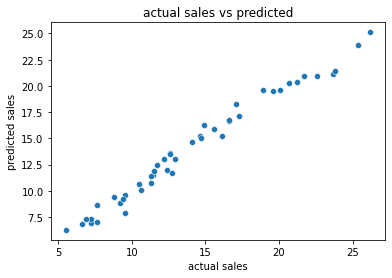

In [74]:
sns.scatterplot(y_test,y_pred)
plt.xlabel("actual sales")
plt.ylabel("predicted sales")
plt.title("actual sales vs predicted")
plt.show()


## OVSERVATION:-RANDOM FOREST is giving best r2_score.ALSO the best parameters arebootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 100}

In [75]:
df2=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [76]:
df2

,Actual,Predicted
5,7.2,6.987595
55,23.7,21.150878
45,14.9,16.278448
84,21.7,20.925483
19,14.6,15.209504
150,16.1,15.268124
58,23.8,21.404045
103,14.7,15.087107
50,11.4,11.534812
147,25.4,23.881746


In [81]:
##SAVING the model
import pickle
filename='advertising_sales'
pickle.dump(rf,open(filename,'wb'))